In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import pylab as pl
import datetime

In [16]:
''' Funcion que recibe 2 vectores de igual dimension, y la dimension de estos, y calcula la
    distancia Manhattan para estos'''
def calcular_distancia_manhattan(v1,v2,dim):
    dist=0
    for i in xrange(dim):
        dist += abs(v1[i] - v2[i])
    return dist

In [17]:
viajes = pd.read_csv("trip.csv")

In [18]:
estaciones = pd.read_csv("station.csv")
estaciones = estaciones[['id', 'lat', 'long']]
#estaciones.rename(columns={'lat': 'startLat', 'long': 'startLong'})

In [19]:
viajes_mergeado = pd.merge(viajes, estaciones, left_on = ['start_station_id'], right_on = ['id'])

In [20]:
viajes_mergeado2 = pd.merge(viajes_mergeado, estaciones, left_on = ['end_station_id'], right_on = ['id'])
viajes_mergeado2 = viajes_mergeado2.rename(columns={'lat_x': 'startLat', 'long_x': 'startLong', 'lat_y': 'endLat', 'long_y': 'endLong'})

In [21]:
viajes_mergeado2['distancia'] = calcular_distancia_manhattan([viajes_mergeado2['startLong'], viajes_mergeado2['startLat']],
                                                            [viajes_mergeado2['endLong'], viajes_mergeado2['endLat']],
                                                            2)


In [22]:
viajes_mergeado2 = viajes_mergeado2[(viajes_mergeado2['duration'] < 43200) & (viajes_mergeado2['start_station_id'] != viajes_mergeado2['end_station_id'])]
viajes_duracion_distancia = viajes_mergeado2[['duration', 'distancia']]
viajes_duracion_distancia

,duration,distancia
368,236,0.006869
369,440,0.006869
370,449,0.006869
371,561,0.006869
372,528,0.006869
373,547,0.006869
374,376,0.006869
375,399,0.006869
376,459,0.006869
377,429,0.006869


In [23]:
vddg = viajes_duracion_distancia.groupby('distancia').mean()
vddg['dist'] = vddg.index
vddg

,duration,dist
distancia,,
0.000227,4302.118367,0.000227
0.001484,4455.387755,0.001484
0.001559,1844.975000,0.001559
0.002199,4723.393064,0.002199
0.002762,939.166172,0.002762
0.002841,1016.982301,0.002841
0.002881,1509.932432,0.002881
0.002916,2126.589552,0.002916
0.002981,1446.911111,0.002981


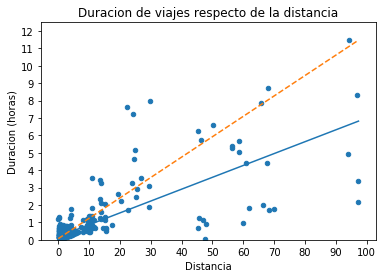

In [35]:
%matplotlib inline

vddg.plot.scatter(x='dist', y='duration')
plt.xlabel('Distancia')
plt.ylabel('Duracion (horas)')
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda y, _: '{}'.format((int(y)/60)/60))) #Para darle formato a los valores de los ticks
ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x, _: '{}'.format(int(x*100))))
ax.yaxis.set_ticks(np.arange(0, 45000, 3600))
ax.xaxis.set_ticks(np.arange(0, 1.1, 0.1))
ax.set_ylim([0,45000])

'''x = vddg[vddg['dist'] > 0]['dist'] 
y = vddg[vddg['dist'] > 0]['duration']
a, b = np.polyfit(np.log(x), y, 1)
yn = a * np.log(x) + b
plt.plot(x, yn)'''

from scipy.stats import linregress
def fit_line1(x, y):
    """Return slope, intercept of best fit line."""
    # Remove entries where either x or y is NaN.
    clean_data = pd.concat([x, y], 1).dropna(0) # row-wise
    (_, x), (_, y) = clean_data.iteritems()
    slope, intercept, r, p, stderr = linregress(x, y)
    return slope, intercept # could also return stderr

m, b = fit_line1(vddg['dist'], vddg['duration'])
N = 861
points = np.linspace(vddg['dist'].min(), vddg['dist'].max(), N)
points2 = np.linspace(vddg['duration'].min(), vddg['duration'].max(), N)
plt.plot(points, m*points + b)
plt.plot(points, points2, linestyle='dashed')


plt.title("Duracion de viajes respecto de la distancia")
plt.show()